Pour lancer l'environnement virtuel: source env0/bin/activate

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
  "figure.facecolor": (0.12, 0.12, 0.12, 1),
  "axes.facecolor": (0.12, 0.12, 0.12, 1)
})

# Fonctions

## Fonction d'Initialisation
La fonction `initialisation` est cruciale car elle définit les paramètres initiaux du modèle, à savoir les poids `W` et le biais `b`. Ces paramètres seront ajustés au cours de l'entraînement. L'initialisation aléatoire est une étape commune dans les algorithmes d'apprentissage automatique.


In [1]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

## Modèle du Neurone Artificiel
La fonction `model` représente notre neurone artificiel. Elle calcule la sortie `A` en appliquant d'abord une fonction linéaire (Z = XW + b), puis une fonction d'activation sigmoïde (A = 1/(1 + e⁻z)). La fonction sigmoïde est choisie pour sa capacité à mapper les valeurs d'entrée entre 0 et 1, ce qui est idéal pour notre problème de classification binaire.


In [2]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

## Fonction de Coût et Calcul des Gradients
La `log_loss` est la fonction de coût utilisée pour évaluer les performances du modèle. Elle mesure l'écart entre les prédictions et les vraies valeurs. Les gradients calculés par la fonction `gradients` sont essentiels pour l'optimisation des paramètres du modèle via la descente de gradient.


In [3]:
def log_loss(A, y):
  epsilon = 10e-15
  return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [4]:
def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

## Mise à jour des Paramètres
La fonction `update` ajuste les paramètres `W` et `b` en fonction des gradients calculés. Le `learning_rate` contrôle l'ampleur de la mise à jour. Une valeur trop élevée peut conduire à un apprentissage instable, tandis qu'une valeur trop faible peut ralentir le processus d'apprentissage.


In [5]:
def update(dW, db, W, b, learning_rate): 
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

## Prédiction et Évaluation
La fonction `predict` utilise le modèle entraîné pour prédire la catégorie d'une plante. L'`accuracy_score` évalue la précision du modèle en comparant les prédictions aux vraies valeurs. Cette métrique est cruciale pour comprendre l'efficacité de notre modèle.


In [6]:
def predict(X, W, b):
  A = model(X, W, b)
  # print(A)
  return A >= 0.5

## Entraînement du Neurone Artificiel et Visualisation
La fonction `artificial_neuron` encapsule le processus d'entraînement de notre neurone artificiel. Elle initialise les paramètres, effectue la descente de gradient et trace la courbe de perte. La visualisation finale montre la frontière de décision du modèle, aidant à visualiser sa capacité à séparer les deux catégories de plantes.


In [7]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1 , n_iteration = 100):
  #initialisation W, b
  W, b = initialisation(X_train)

  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []

  # Boucle d'apprentissage 
  for i in tqdm(range(n_iteration)):
    A = model(X_train, W, b)

    if i %10 == 0:
      # Train
      # calcul du cout
      train_loss.append(log_loss(A, y_train))
      # calcul de l'accuracy
      y_pred = predict(X_train, W, b)
      train_acc.append(accuracy_score(y_train, y_pred))

      # Test
      A_test = model(X_test, W, b)
      # calcul du cout
      test_loss.append(log_loss(A_test, y_test))
      # calcul de l'accuracy
      y_pred = predict(X_test, W, b)
      test_acc.append(accuracy_score(y_test, y_pred))

    # mise à jour
    dW, db = gradients(A, X_train, y_train)
    W, b = update(dW, db, W, b, learning_rate)


  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='train loss')
  plt.plot(test_loss, label='test loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(train_acc, label='train acc')
  plt.plot(test_acc, label='test acc')
  plt.legend()
  plt.show()
  
  return (W, b)

# Application chiens vs chats

In [ ]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


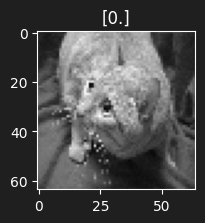

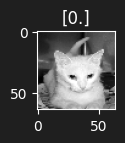

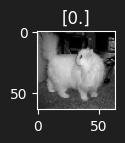

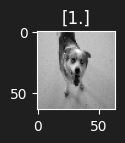

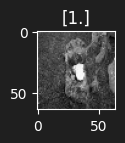

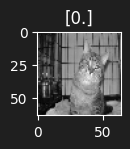

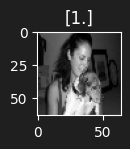

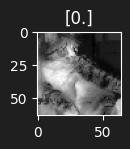

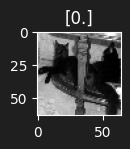

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.tight_layout()
  plt.show()

## Entrainement du modèle

In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [ ]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 10000/10000 [00:38<00:00, 261.82it/s]


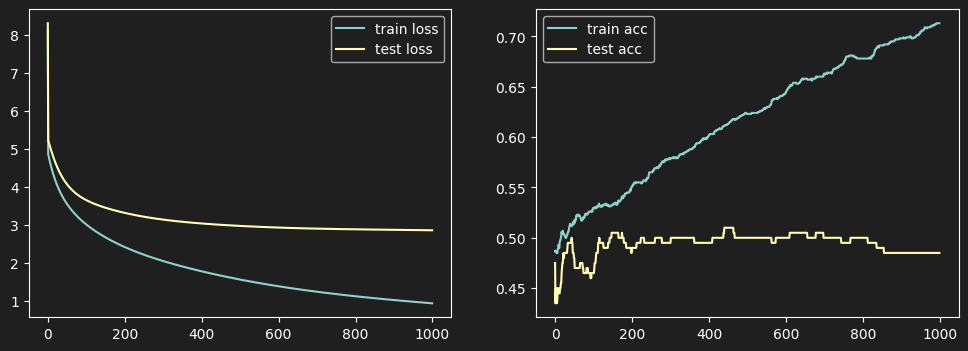

In [ ]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iteration=10000)

Neurone en over-fitting
